# Part2 EDA分析与聚类对比
---
## 2.1 EDA分析
### 2.1.1 运行准备

In [2]:
import data_prep
import common_dict

#basics
import numpy as np
import pandas as pd
import random

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

In [5]:
import warnings
warnings.filterwarnings("ignore")

### 2.1.2 导入数据，查看数据基本结构

In [6]:
# 证监会分类，百分比信息
df0z = data_prep.get_fund_data('src/fund_map_0_ZJH.csv')
# df0z.rename(columns=common_dict.zjhIndustryCodeToName,inplace=True)
df0z.head()

,fund_code,A,B,C,D,E,F,G,H,I,...,K,L,M,N,O,P,Q,R,S,X
0,000082,0.55,0.92,51.10,1.28,0.24,0.69,2.32,0.0,6.08,...,2.65,1.07,0.91,0.58,0.0,0.53,1.51,0.56,0.0,0.0
1,000309,0.00,0.00,36.64,0.00,0.00,0.01,5.68,0.0,14.94,...,0.00,0.00,6.75,0.02,0.0,0.00,0.00,0.00,0.0,0.0
2,000326,2.08,0.54,55.59,0.00,0.00,6.25,3.13,0.0,6.50,...,4.51,2.96,2.14,1.51,0.0,0.00,0.00,0.00,0.0,0.0
3,000409,0.00,0.00,91.19,0.00,0.00,0.00,0.00,0.0,1.54,...,0.00,0.61,0.03,0.01,0.0,0.00,0.00,0.00,0.0,0.0
4,000411,0.27,2.34,49.69,2.49,2.05,0.35,0.24,0.0,1.05,...,1.39,2.61,1.53,0.00,0.0,0.00,2.17,0.00,0.0,0.0


In [13]:
# 证监会分类，股本信息
df1z = data_prep.get_fund_data('src/fund_map_1_ZJH.csv')
# df1z.rename(columns=common_dict.zjhIndustryCodeToName,inplace=True)
df1z.head()

,fund_code,A,B,C,D,E,F,G,H,I,...,K,L,M,N,O,P,Q,R,S,X
0,000082,2067.631665,23435.381260,136493.269046,6597.946983,321.599160,288.236459,4817.321401,0.0,3609.814211,...,15793.275773,1903.917635,1994.355287,1054.641413,0.0,3268.721682,2080.535160,997.0114,0.0,0.0
1,000309,0.000000,0.000000,74432.779695,0.000000,0.000000,1.000000,3225.139216,0.0,12812.590708,...,0.000000,0.000000,13444.021241,4.034308,0.0,0.000000,0.000000,0.0000,0.0,0.0
2,000326,2739.298224,11663.589924,69730.483552,0.000000,0.000000,3765.656243,6454.434820,0.0,5088.097223,...,18023.838192,7266.416384,2796.080642,2348.471739,0.0,0.000000,0.000000,0.0000,0.0,0.0
3,000409,0.000000,0.000000,172074.069151,0.000000,0.000000,0.000000,0.000000,0.0,6874.534369,...,0.000000,1191.010055,2.287470,0.594700,0.0,0.000000,0.000000,0.0000,0.0,0.0
4,000411,1015.019181,36151.573720,204800.642597,13080.918735,10073.792575,1002.243375,1129.877385,0.0,1299.463543,...,3939.240536,16218.307881,2771.720349,0.000000,0.0,0.000000,1146.790843,0.0000,0.0,0.0


In [14]:
# 申万分类，百分比信息
df0s = data_prep.get_fund_data('src/fund_map_0_SW.csv')
df0s.rename(columns=common_dict.swIndustryCodeToName,inplace=True)
df0s.head()

,fund_code,采掘,化工,钢铁,有色金属,建筑材料,建筑装饰,电气设备,机械设备,国防军工,...,计算机,传媒,通信,公用事业,交通运输,房地产,银行,非银金融,综合,非H股
0,000082,0.83,3.76,1.48,3.49,1.47,1.05,4.59,2.16,1.42,...,3.39,2.49,1.03,1.86,2.32,2.65,8.23,10.64,0.30,0.0
1,000309,0.00,0.02,0.00,0.00,1.67,0.00,0.00,0.06,0.01,...,24.38,0.00,0.00,0.02,5.68,0.00,23.52,7.07,0.00,0.0
2,000326,0.47,8.99,0.00,3.13,0.64,0.97,4.36,1.17,1.95,...,5.69,1.06,1.06,1.51,3.13,4.51,4.39,0.00,0.01,0.0
3,000409,0.00,15.26,0.00,7.09,0.00,0.00,43.25,2.82,2.88,...,0.06,0.00,0.08,0.01,0.00,0.00,0.00,0.15,0.00,0.0
4,000411,1.34,2.00,1.63,1.94,0.46,2.05,5.19,3.35,1.41,...,0.64,1.21,0.32,2.49,0.84,1.39,12.52,13.02,0.00,0.0


In [15]:
# 申万分类，股本信息
df1s = data_prep.get_fund_data('src/fund_map_1_SW.csv')
df1s.rename(columns=common_dict.swIndustryCodeToName,inplace=True)
df1s.head()

,fund_code,采掘,化工,钢铁,有色金属,建筑材料,建筑装饰,电气设备,机械设备,国防军工,...,计算机,传媒,通信,公用事业,交通运输,房地产,银行,非银金融,综合,非H股
0,000082,706.723918,7191.229727,3738.068172,25884.688263,1423.394055,745.811469,11284.120277,1843.525674,2243.339225,...,2952.165435,5275.571016,748.723584,7660.866159,4817.321401,15793.275773,154963.601665,128193.850319,499.54071,0.0
1,000309,0.000000,4.802000,0.000000,0.000000,1061.070572,0.000000,0.000000,8.514102,2.102400,...,19097.001668,0.000000,0.000000,4.034308,3225.139216,0.000000,408908.601666,92772.566716,0.00000,0.0
2,000326,931.754367,11357.800285,0.000000,13893.450352,1373.563712,190.150070,2548.181967,4963.338404,391.161640,...,5103.741755,152.964360,383.936770,2355.683133,6454.434820,18023.838192,13633.229776,0.000000,0.76000,0.0
3,000409,0.000000,8193.486050,0.000000,9570.521927,0.000000,0.000000,72564.794750,2543.566467,2200.806882,...,34.723545,0.000000,22.845670,0.594700,0.000000,0.000000,0.000000,724.088535,0.00000,0.0
4,000411,10678.722420,5314.019128,7333.569716,26772.590860,604.708970,10073.792575,12953.654507,16440.354644,647.392218,...,628.015740,13412.425264,112.976528,13080.918735,2671.484528,3939.240536,272119.151624,156353.235402,0.00000,0.0


### 2.1.3 查看数据分布
1. 证监会类别按照百分比与股本分布

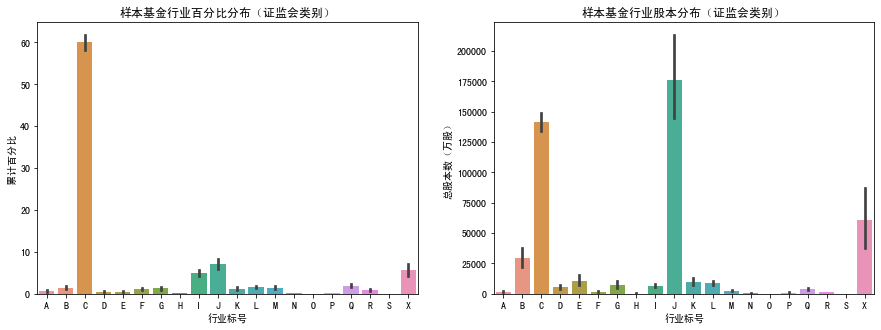

In [10]:
# 排除基金标号列
df0z_data = df0z.iloc[:, 1:]
df1z_data = df1z.iloc[:, 1:]

p1 = plt.figure(figsize=(15,5))
ax1 = p1.add_subplot(1,2,1)
sns.barplot(data=df0z_data)
plt.title("样本基金行业百分比分布（证监会类别）")
plt.ylabel('累计百分比')
plt.xlabel('行业标号')

ax2 = p1.add_subplot(1,2,2)
sns.barplot(data=df1z_data)
plt.title("样本基金行业股本分布（证监会类别）")
plt.ylabel('总股本数（万股）')
plt.xlabel('行业标号')

plt.show()

2. 申万类别按照百分比与股本分布

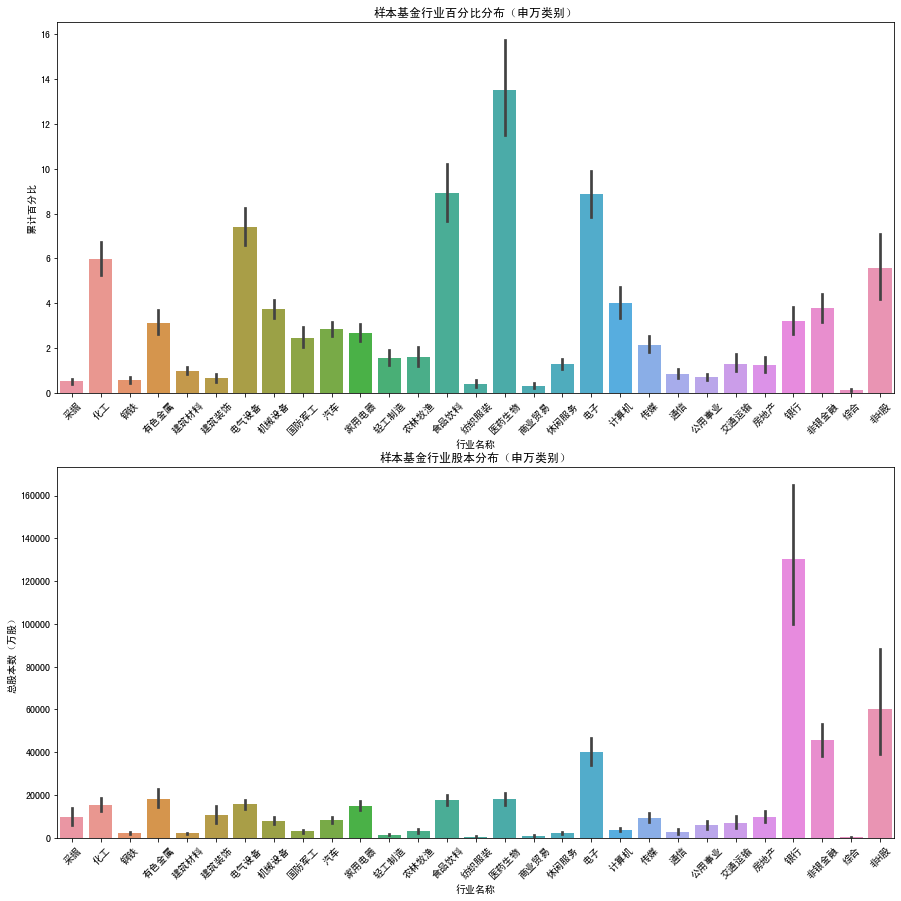

In [16]:
# 排除基金标号列
df0s_data = df0s.iloc[:, 1:]
df1s_data = df1s.iloc[:, 1:]

p1 = plt.figure(figsize=(15,15))
ax1 = p1.add_subplot(2,1,1)
sns.barplot(data=df0s_data)
plt.title("样本基金行业百分比分布（申万类别）")
plt.ylabel('累计百分比')
plt.xlabel('行业名称')
plt.xticks(rotation=45)

ax2 = p1.add_subplot(2,1,2)
sns.barplot(data=df1s_data)
plt.title("样本基金行业股本分布（申万类别）")
plt.ylabel('总股本数（万股）')
plt.xlabel('行业名称')
plt.xticks(rotation=45)

plt.show()

---
## 2.2 聚类分析
### 2.2.1 聚类前数据分析
使用T-SNE方法将数据降维到二维或三维，查看分布信息
（2/3 - 维度；z - 证监会；p - 百分比；s - 股本；s - 申万）

In [17]:
# 数据计算
tsne2zp=TSNE()
tsne2zp.fit_transform(df0z_data)
tsne2zp=pd.DataFrame(tsne2zp.embedding_,index=df0z_data.index)

tsne2zs=TSNE()
tsne2zs.fit_transform(df1z_data)
tsne2zs=pd.DataFrame(tsne2zs.embedding_,index=df1z_data.index)

tsne2sp=TSNE()
tsne2sp.fit_transform(df0s_data)
tsne2sp=pd.DataFrame(tsne2sp.embedding_,index=df0s_data.index)

tsne2ss=TSNE()
tsne2ss.fit_transform(df1s_data)
tsne2ss=pd.DataFrame(tsne2ss.embedding_,index=df1s_data.index)

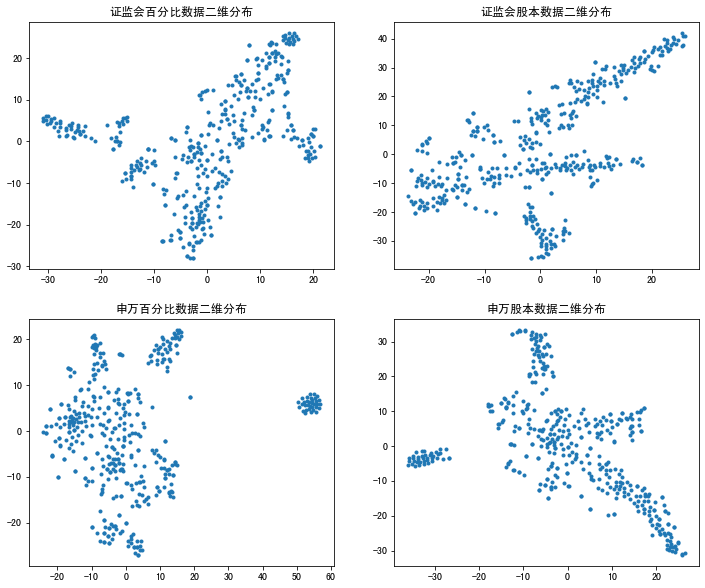

In [19]:
# 作图
p1 = plt.figure(figsize=(12,10))
ax1 = p1.add_subplot(2,2,1)
fig = plt.plot(tsne2zp[0],tsne2zp[1],'.')
plt.title("证监会百分比数据二维分布") 

ax2 = p1.add_subplot(2,2,2)
fig = plt.plot(tsne2zs[0],tsne2zs[1],'.')
plt.title("证监会股本数据二维分布")

ax3 = p1.add_subplot(2,2,3)
fig = plt.plot(tsne2sp[0],tsne2sp[1],'.')
plt.title("申万百分比数据二维分布")  

ax3 = p1.add_subplot(2,2,4)
fig = plt.plot(tsne2ss[0],tsne2ss[1],'.')
plt.title("申万股本数据二维分布")
                
plt.show()

### 2.2.2 K-Means初步聚类
使用sklean实现k-means初步聚类
1. 聚类簇数与SSE比对

In [37]:
# 证监会百分比数据
sse0z = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df0z_data)
    sse0z[k] = kmeans.inertia_
    
sse1z = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df1z_data)
    sse1z[k] = kmeans.inertia_
    
# 申万数据
sse0s = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df0s_data)
    sse0s[k] = kmeans.inertia_
    
sse1s = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(df1s_data)
    sse1s[k] = kmeans.inertia_

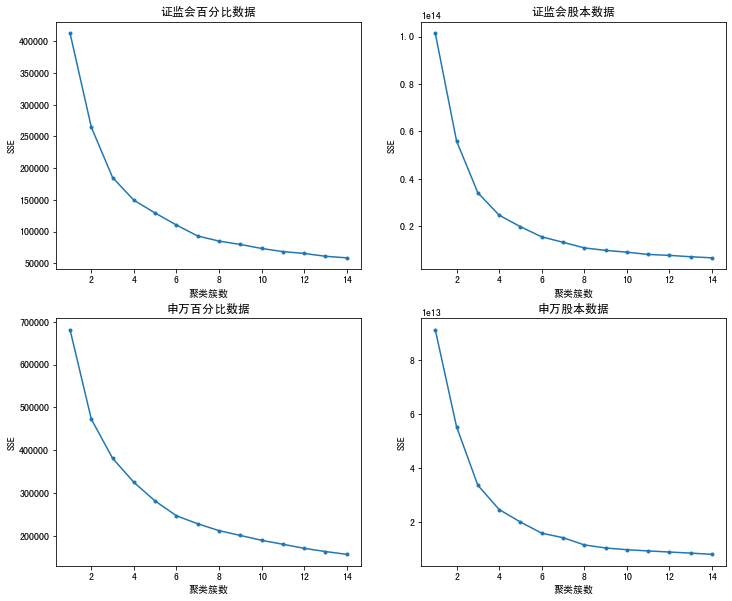

In [38]:
p1 = plt.figure(figsize=(12,10))
ax1 = p1.add_subplot(2,2,1)
plt.plot(list(sse0z.keys()), list(sse0z.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.title("证监会百分比数据")

ax2 = p1.add_subplot(2,2,2)
plt.plot(list(sse1z.keys()), list(sse1z.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.title("证监会股本数据")

ax3 = p1.add_subplot(2,2,3)
plt.plot(list(sse0s.keys()), list(sse0s.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.title("申万百分比数据")

ax4 = p1.add_subplot(2,2,4)
plt.plot(list(sse1s.keys()), list(sse1s.values()),'.-')
plt.xlabel("聚类簇数")
plt.ylabel("SSE")
plt.title("申万股本数据")

p1.show()

2. 选择不同K值聚类

In [39]:
clusters = [6, 7, 8]

# 证监局百分比数据
# K-means聚类
pred = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++')
    kmeans.fit(df0z_data)
    pred.append(kmeans.predict(df0z_data))

# 聚类结果分类
predictions_zp = pd.DataFrame(pred).T
predictions_zp.columns = ['cluster_6','cluster_7','cluster_8']
print(predictions_zp.apply(lambda row: row.value_counts(),axis = 0).fillna(0).astype("int"))

   cluster_6  cluster_7  cluster_8
0        166        116        131
1         14         71         14
2         77         14         32
3        148        160          6
4          6          6         26
5         24         25        118
6          0         43         38
7          0          0         70


In [40]:
# 证监局股本数据
# K-means聚类
pred = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++')
    kmeans.fit(df1z_data)
    pred.append(kmeans.predict(df1z_data))

# 聚类结果分类
predictions_zs = pd.DataFrame(pred).T
predictions_zs.columns = ['cluster_6','cluster_7','cluster_8']
print(predictions_zs.apply(lambda row: row.value_counts(),axis = 0).fillna(0).astype("int"))

   cluster_6  cluster_7  cluster_8
0        322         56        289
1         23        318         18
2         53          2          2
3         29         20         30
4          3         31          3
5          5          3          5
6          0          5         57
7          0          0         31


In [41]:
# 申万百分比数据
# K-means聚类
pred = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++')
    kmeans.fit(df0s_data)
    pred.append(kmeans.predict(df0s_data))

# 聚类结果分类
predictions_sp = pd.DataFrame(pred).T
predictions_sp.columns = ['cluster_6','cluster_7','cluster_8']
print(predictions_sp.apply(lambda row: row.value_counts(),axis = 0).fillna(0).astype("int"))

   cluster_6  cluster_7  cluster_8
0         58         31         33
1         33         33         96
2         34         36         59
3         35         35         43
4        238        103         13
5         37        139        132
6          0         58         31
7          0          0         28


In [42]:
# 申万股本数据
# K-means聚类
pred = []
for n in clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++')
    kmeans.fit(df1s_data)
    pred.append(kmeans.predict(df1s_data))

# 聚类结果分类
predictions_ss = pd.DataFrame(pred).T
predictions_ss.columns = ['cluster_6','cluster_7','cluster_8']
print(predictions_ss.apply(lambda row: row.value_counts(),axis = 0).fillna(0).astype("int"))

   cluster_6  cluster_7  cluster_8
0        334        328         61
1          3          3         31
2          5         16         13
3         50          2          5
4         27         31          3
5         16         50          2
6          0          5         22
7          0          0        298


3. 聚类结果作图

<Figure size 432x288 with 0 Axes>

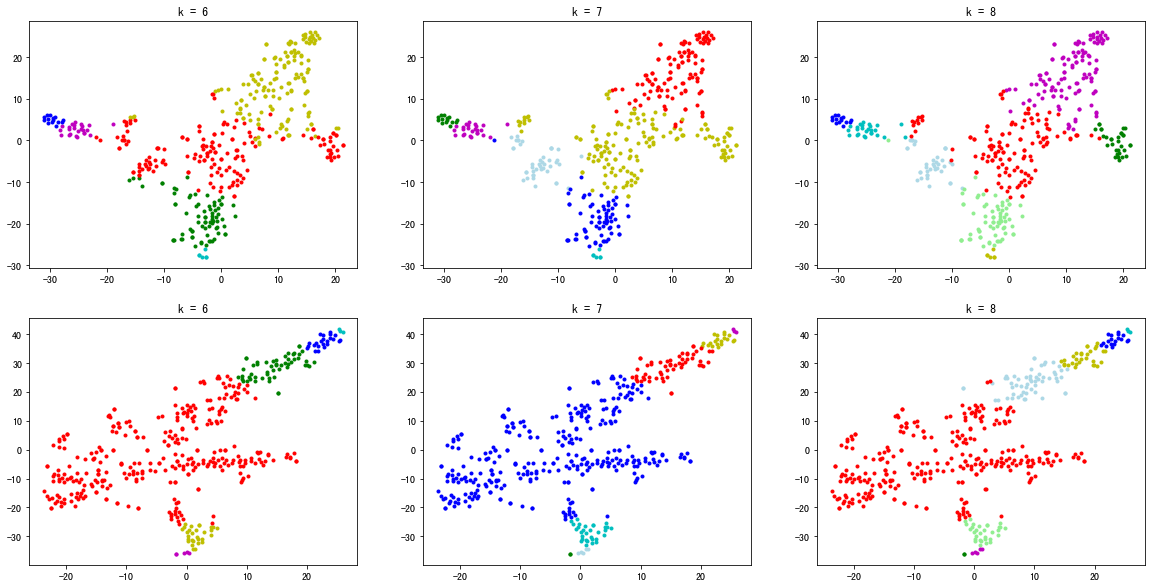

In [43]:
fig = plt.figure()
frame2zp = pd.DataFrame(tsne2zp)
# frame3zp = pd.DataFrame(tsne3zp)

color = ['r', 'b', 'g', 'y', 'c', 'm', 'lightblue', 'lightgreen', 'orange']
sampleNum, _ = frame2zp.shape

p1 = plt.figure(figsize=(20,10))
ax1 = p1.add_subplot(2,3,1)
for i in range(sampleNum):
    markIndex = predictions_zp['cluster_6'][i]
    plt.plot(frame2zp[0][i], frame2zp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 6")
    
ax2 = p1.add_subplot(2,3,2)
for i in range(sampleNum):
    markIndex = predictions_zp['cluster_7'][i]
    plt.plot(frame2zp[0][i], frame2zp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 7")
    
ax3 = p1.add_subplot(2,3,3)
for i in range(sampleNum):
    markIndex = predictions_zp['cluster_8'][i]
    plt.plot(frame2zp[0][i], frame2zp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 8")
    
frame2zs = pd.DataFrame(tsne2zs)
# frame3zs = pd.DataFrame(tsne3zs)

color = ['r', 'b', 'g', 'y', 'c', 'm', 'lightblue', 'lightgreen', 'orange']
sampleNum, _ = frame2zs.shape

ax4 = p1.add_subplot(2,3,4)
for i in range(sampleNum):
    markIndex = predictions_zs['cluster_6'][i]
    plt.plot(frame2zs[0][i], frame2zs[1][i], c=color[markIndex], marker = '.')
plt.title("k = 6")
    
ax5 = p1.add_subplot(2,3,5)
for i in range(sampleNum):
    markIndex = predictions_zs['cluster_7'][i]
    plt.plot(frame2zs[0][i], frame2zs[1][i], c=color[markIndex], marker = '.')
plt.title("k = 7")
    
ax6 = p1.add_subplot(2,3,6)
for i in range(sampleNum):
    markIndex = predictions_zs['cluster_8'][i]
    plt.plot(frame2zs[0][i], frame2zs[1][i], c=color[markIndex], marker = '.')
plt.title("k = 8")

plt.show()

<Figure size 432x288 with 0 Axes>

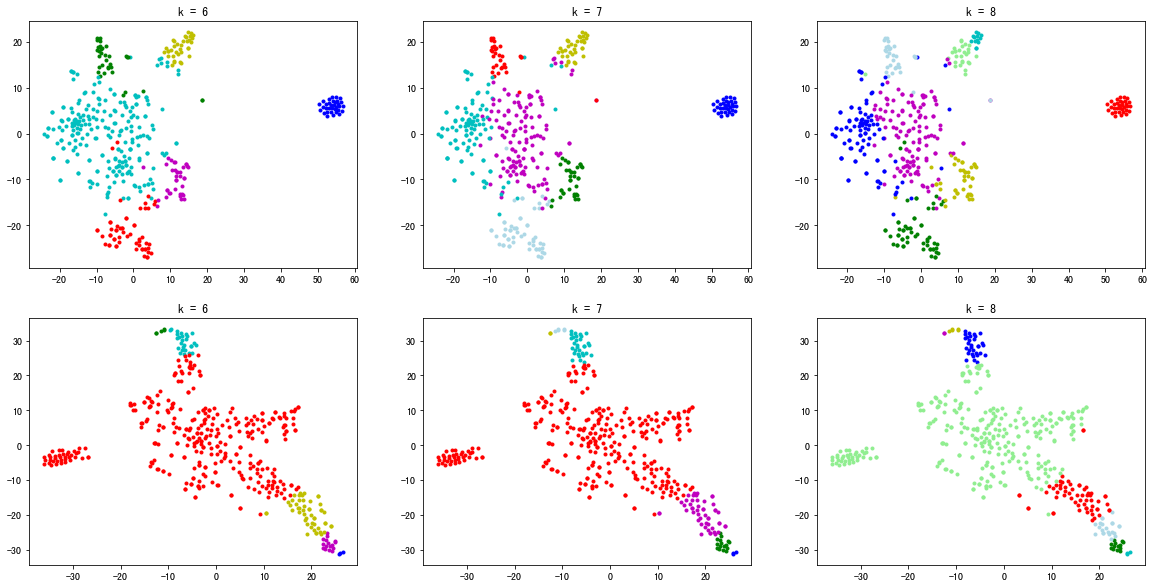

In [44]:
fig = plt.figure()
frame2sp = pd.DataFrame(tsne2sp)
# frame3sp = pd.DataFrame(tsne3sp)

color = ['r', 'b', 'g', 'y', 'c', 'm', 'lightblue', 'lightgreen', 'orange']
sampleNum, _ = frame2sp.shape

p1 = plt.figure(figsize=(20,10))
ax1 = p1.add_subplot(2,3,1)
for i in range(sampleNum):
    markIndex = predictions_sp['cluster_6'][i]
    plt.plot(frame2sp[0][i], frame2sp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 6")
    
ax2 = p1.add_subplot(2,3,2)
for i in range(sampleNum):
    markIndex = predictions_sp['cluster_7'][i]
    plt.plot(frame2sp[0][i], frame2sp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 7")
    
ax3 = p1.add_subplot(2,3,3)
for i in range(sampleNum):
    markIndex = predictions_sp['cluster_8'][i]
    plt.plot(frame2sp[0][i], frame2sp[1][i], c=color[markIndex], marker = '.')
plt.title("k = 8")
    
frame2ss = pd.DataFrame(tsne2ss)
sampleNum, _ = frame2ss.shape

ax4 = p1.add_subplot(2,3,4)
for i in range(sampleNum):
    markIndex = predictions_ss['cluster_6'][i]
    plt.plot(frame2ss[0][i], frame2ss[1][i], c=color[markIndex], marker = '.')
plt.title("k = 6")
    
ax5 = p1.add_subplot(2,3,5)
for i in range(sampleNum):
    markIndex = predictions_ss['cluster_7'][i]
    plt.plot(frame2ss[0][i], frame2ss[1][i], c=color[markIndex], marker = '.')
plt.title("k = 7")
    
ax6 = p1.add_subplot(2,3,6)
for i in range(sampleNum):
    markIndex = predictions_ss['cluster_8'][i]
    plt.plot(frame2ss[0][i], frame2ss[1][i], c=color[markIndex], marker = '.')
plt.title("k = 8")

plt.show()

4. 聚类结果分析  
证监局百分比数据对应类别

In [48]:
# 证监局百分比聚类实际对应类别（k=7）
predictions = predictions_zp
means = df0z_data[predictions['cluster_8'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['name_0'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_0'] = list(round(means,2))

means = df0z_data[predictions['cluster_8'] == 1].mean().sort_values(ascending=False)
sorted_cate['name_1'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_1'] = list(round(means,2))

means = df0z_data[predictions['cluster_8'] == 2].mean().sort_values(ascending=False)
sorted_cate['name_2'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_2'] = list(round(means,2))

means = df0z_data[predictions['cluster_8'] == 3].mean().sort_values(ascending=False)
sorted_cate['name_3'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_3'] = list(round(means,2))

means = df0z_data[predictions['cluster_8'] == 4].mean().sort_values(ascending=False)
sorted_cate['name_4'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_4'] = list(round(means,2))

means = df0z_data[predictions['cluster_8'] == 5].mean().sort_values(ascending=False)
sorted_cate['name_5'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(round(means,2))

means = df0z_data[predictions['cluster_8'] == 6].mean().sort_values(ascending=False)
sorted_cate['name_6'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_6'] = list(round(means,2))

means = df0z_data[predictions['cluster_8'] == 7].mean().sort_values(ascending=False)
sorted_cate['name_7'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_7'] = list(round(means,2))

pd.set_option('display.max_columns',None)
sorted_cate.head()


,name_0,mean_0,name_1,mean_1,name_2,mean_2,name_3,mean_3,name_4,mean_4,name_5,mean_5,name_6,mean_6,name_7,mean_7
0,制造业,63.65,非H股,76.85,制造业,62.08,金融业,71.77,制造业,36.98,制造业,82.01,制造业,51.58,制造业,42.84
1,金融业,5.61,制造业,10.49,卫生和社会工作,14.35,非H股,8.21,非H股,34.46,信息传输、软件和信息技术服务业,2.12,信息传输、软件和信息技术服务业,25.66,金融业,22.23
2,信息传输、软件和信息技术服务业,4.34,信息传输、软件和信息技术服务业,0.53,科学研究和技术服务业,10.05,房地产业,5.39,信息传输、软件和信息技术服务业,3.83,租赁和商务服务业,1.35,非H股,3.11,房地产业,4.02
3,租赁和商务服务业,2.20,交通运输、仓储和邮政业,0.16,批发和零售业,2.59,制造业,5.21,金融业,3.10,金融业,1.35,金融业,2.86,交通运输、仓储和邮政业,3.53
4,采矿业,1.91,批发和零售业,0.11,非H股,0.99,采矿业,0.80,交通运输、仓储和邮政业,2.73,采矿业,1.18,租赁和商务服务业,2.28,信息传输、软件和信息技术服务业,3.41


证监局股本数据对应类别

In [49]:
# 证监局股本聚类实际对应类别（k=6）
predictions = predictions_zs
means = df1z_data[predictions['cluster_6'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['name_0'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_0'] = list(round(means,2))

means = df1z_data[predictions['cluster_6'] == 1].mean().sort_values(ascending=False)
sorted_cate['name_1'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_1'] = list(round(means,2))

means = df1z_data[predictions['cluster_6'] == 2].mean().sort_values(ascending=False)
sorted_cate['name_2'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_2'] = list(round(means,2))

means = df1z_data[predictions['cluster_6'] == 3].mean().sort_values(ascending=False)
sorted_cate['name_3'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_3'] = list(round(means,2))

means = df1z_data[predictions['cluster_6'] == 4].mean().sort_values(ascending=False)
sorted_cate['name_4'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_4'] = list(round(means,2))

means = df1z_data[predictions['cluster_6'] == 5].mean().sort_values(ascending=False)
sorted_cate['name_5'] = pd.DataFrame(means.index)[0].apply(lambda x : common_dict.zjhIndustryCodeToName[x])
sorted_cate['mean_5'] = list(round(means,2))

sorted_cate.head()

,name_0,mean_0,name_1,mean_1,name_2,mean_2,name_3,mean_3,name_4,mean_4,name_5,mean_5
0,制造业,144385.54,金融业,1270797.84,金融业,467384.13,非H股,402905.03,金融业,2759518.86,非H股,2135616.13
1,金融业,39983.97,制造业,166526.48,制造业,152990.16,制造业,87387.58,采矿业,388910.24,金融业,57588.51
2,采矿业,18091.51,采矿业,107931.87,采矿业,60087.61,金融业,35264.31,制造业,136559.75,制造业,29397.86
3,非H股,10428.31,建筑业,38249.98,建筑业,52048.24,交通运输、仓储和邮政业,8549.20,电力、热力、燃气及水生产和供应业,101404.54,房地产业,11594.50
4,租赁和商务服务业,9367.16,房地产业,36370.37,房地产业,32309.94,租赁和商务服务业,4966.23,房地产业,38832.98,交通运输、仓储和邮政业,9658.56


In [25]:
# 申万百分比聚类实际对应类别（k=7）
predictions = predictions_sp
means = df0s_data[predictions['cluster_7'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['mean_0'] = list(means)

means = df0s_data[predictions['cluster_7'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['mean_1'] = list(means)

means = df0s_data[predictions['cluster_7'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['mean_2'] = list(means)

means = df0s_data[predictions['cluster_7'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['mean_3'] = list(means)

means = df0s_data[predictions['cluster_7'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['mean_4'] = list(means)

means = df0s_data[predictions['cluster_7'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['mean_5'] = list(means)

means = df0s_data[predictions['cluster_7'] == 6].mean().sort_values(ascending=False)
sorted_cate['cate_6'] = list(means.index)
sorted_cate['mean_6'] = list(means)

pd.set_option('display.max_columns',None)
sorted_cate.head(10)

,cate_0,mean_0,cate_1,mean_1,cate_2,mean_2,cate_3,mean_3,cate_4,mean_4,cate_5,mean_5,cate_6,mean_6
0,非银金融,10.135983,医药生物,87.623636,非H股,58.169310,食品饮料,46.940000,电气设备,23.445217,医药生物,13.614648,电子,37.601944
1,银行,9.671111,非H股,0.960909,食品饮料,5.460690,医药生物,6.370938,化工,21.593913,电子,9.786056,计算机,19.315000
2,食品饮料,8.808803,化工,0.463636,电子,5.459310,农林牧渔,5.758750,有色金属,12.887391,电气设备,9.235775,电气设备,7.825833
3,医药生物,5.776239,机械设备,0.326061,医药生物,2.886897,家用电器,5.182187,汽车,5.331522,食品饮料,8.073732,传媒,4.075000
4,电子,5.575983,计算机,0.221212,电气设备,2.352069,休闲服务,3.349375,电子,5.316087,化工,7.100493,非H股,3.156389
5,家用电器,4.582393,电气设备,0.151515,计算机,2.291034,电气设备,3.152812,机械设备,5.117609,机械设备,6.152746,机械设备,3.008056
6,汽车,3.523162,传媒,0.149697,农林牧渔,1.832414,非H股,3.031562,国防军工,4.168261,计算机,4.236056,国防军工,2.523611
7,房地产,3.309573,非银金融,0.148182,交通运输,1.588966,计算机,2.602500,计算机,1.560217,国防军工,3.409437,化工,2.514444
8,化工,3.300171,轻工制造,0.143939,化工,1.566207,机械设备,2.161563,建筑材料,1.507609,汽车,3.279296,通信,1.983889
9,电气设备,3.230769,食品饮料,0.126667,传媒,0.871724,化工,2.043750,家用电器,1.320435,有色金属,2.680634,有色金属,1.889444


In [50]:
# 申万股本聚类实际对应类别（k=6）
predictions = predictions_ss
means = df1s_data[predictions['cluster_6'] == 0].mean().sort_values(ascending=False)
sorted_cate = pd.DataFrame()
sorted_cate['cate_0'] = list(means.index)
sorted_cate['mean_0'] = list(round(means,2))

means = df1s_data[predictions['cluster_6'] == 1].mean().sort_values(ascending=False)
sorted_cate['cate_1'] = list(means.index)
sorted_cate['mean_1'] = list(round(means,2))

means = df1s_data[predictions['cluster_6'] == 2].mean().sort_values(ascending=False)
sorted_cate['cate_2'] = list(means.index)
sorted_cate['mean_2'] = list(round(means,2))

means = df1s_data[predictions['cluster_6'] == 3].mean().sort_values(ascending=False)
sorted_cate['cate_3'] = list(means.index)
sorted_cate['mean_3'] = list(round(means,2))

means = df1s_data[predictions['cluster_6'] == 4].mean().sort_values(ascending=False)
sorted_cate['cate_4'] = list(means.index)
sorted_cate['mean_4'] = list(round(means,2))

means = df1s_data[predictions['cluster_6'] == 5].mean().sort_values(ascending=False)
sorted_cate['cate_5'] = list(means.index)
sorted_cate['mean_5'] = list(round(means,2))

pd.set_option('display.max_columns',None)
sorted_cate.head()

,cate_0,mean_0,cate_1,mean_1,cate_2,mean_2,cate_3,mean_3,cate_4,mean_4,cate_5,mean_5
0,电子,39914.07,银行,2758859.15,非H股,2135631.20,银行,411769.87,非H股,417270.73,银行,1210918.78
1,非银金融,25438.39,采掘,250443.64,银行,57588.51,非银金融,158072.28,电子,34243.05,非银金融,183357.08
2,银行,22798.01,化工,139852.18,房地产,11594.50,建筑装饰,56242.76,非银金融,18605.79,采掘,68566.69
3,医药生物,20425.02,公用事业,101405.76,机械设备,10606.69,电子,43008.24,食品饮料,18367.83,化工,62830.94
4,有色金属,19372.23,房地产,44603.80,交通运输,9658.56,房地产,38238.49,银行,17869.59,电子,57428.62


选用申万分类百分比数据下的k=7聚类   
类别：制造业、医药、港股、食品（消费）、电子计算机、金融、综合（偏技术）

### 2.2.3 层次聚类
1. 构建数据

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [22]:
Zs = linkage(df0z_data, 'single')
Zc = linkage(df0z_data, 'complete')
Za = linkage(df0z_data, 'average')
Zw = linkage(df0z_data, 'ward')
cs, coph_dists = cophenet(Zs, pdist(df0z_data))
cc, coph_dists = cophenet(Zc, pdist(df0z_data))
ca, coph_dists = cophenet(Za, pdist(df0z_data))
cw, coph_dists = cophenet(Zw, pdist(df0z_data))
print(cs,cc,ca,cw)

0.6540898769240483 0.700568364737454 0.8954984804273959 0.6229165066220073


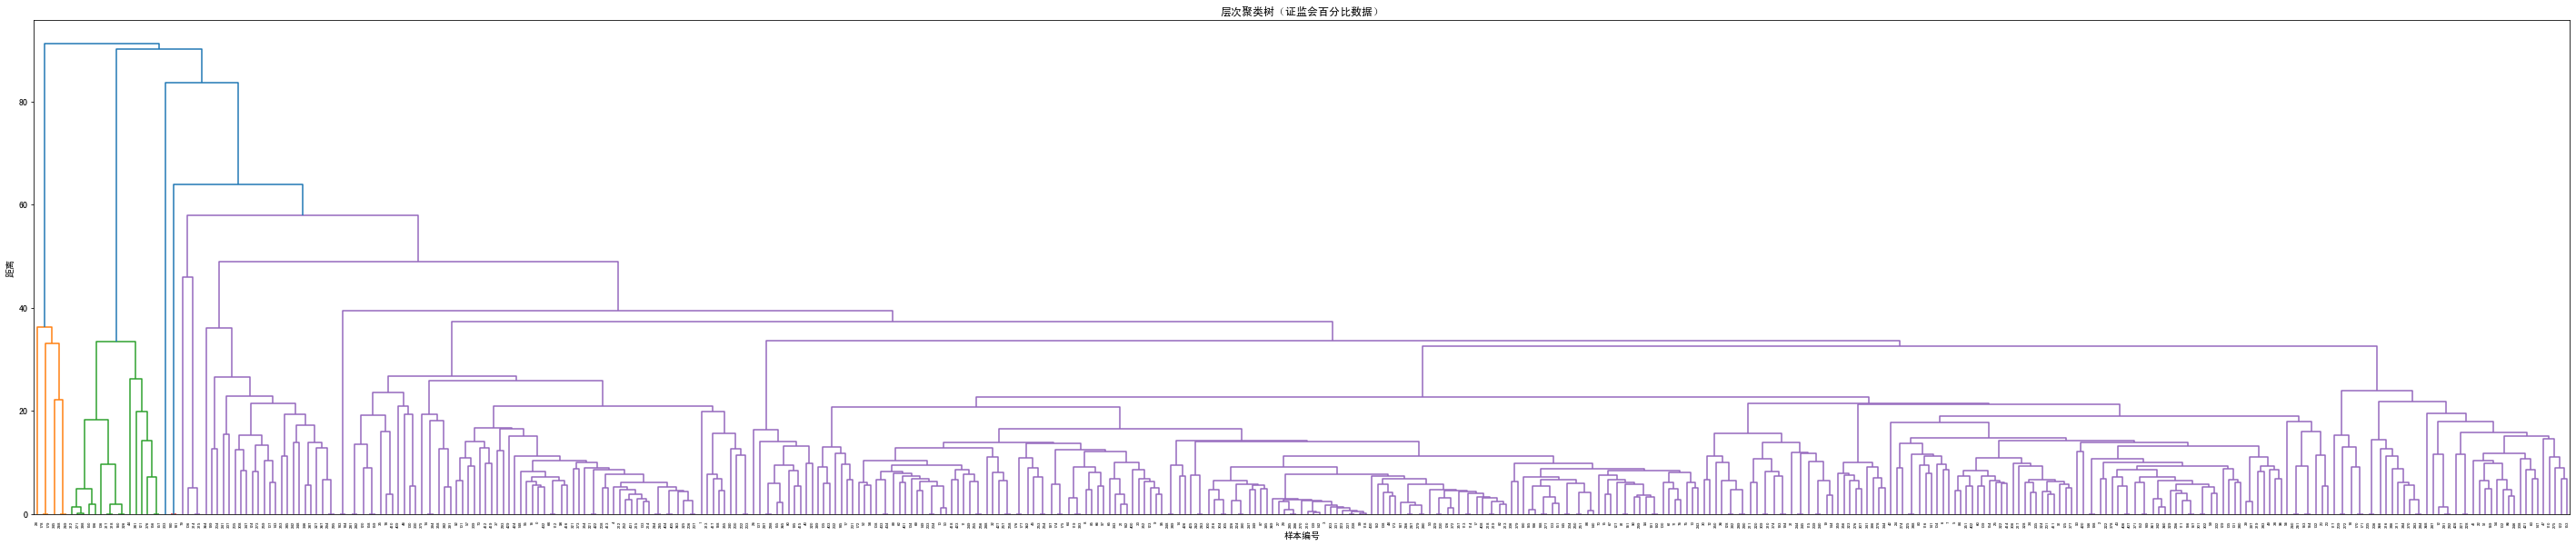

In [25]:
plt.figure(figsize=(50, 10))
plt.title('层次聚类树（证监会百分比数据）')
plt.xlabel('样本编号')
plt.ylabel('距离')
dendrogram(Za)
plt.show()

In [29]:
Za0z = linkage(df0z_data, 'average')
Za1z = linkage(df1z_data, 'average')
Za0s = linkage(df0s_data, 'average')
Za1s = linkage(df1s_data, 'average')

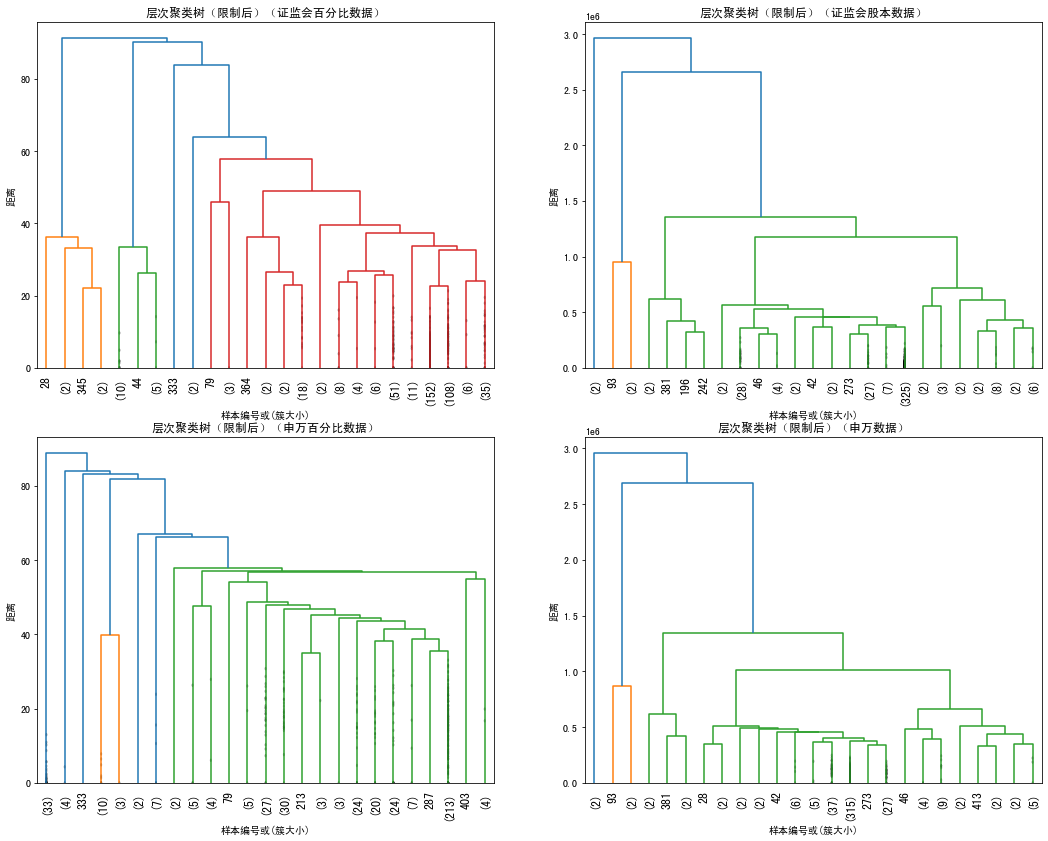

In [36]:
# 作图
p1 = plt.figure(figsize=(18,14))
ax1 = p1.add_subplot(2,2,1)
plt.xlabel('样本编号或(簇大小)')
plt.ylabel('距离')
fig = dendrogram(Za0z, truncate_mode='lastp', p=25, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("层次聚类树（限制后）（证监会百分比数据）") 

ax2 = p1.add_subplot(2,2,2)
plt.xlabel('样本编号或(簇大小)')
plt.ylabel('距离')
fig = dendrogram(Za1z, truncate_mode='lastp', p=25, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("层次聚类树（限制后）（证监会股本数据）")

ax3 = p1.add_subplot(2,2,3)
plt.xlabel('样本编号或(簇大小)')
plt.ylabel('距离')
fig = dendrogram(Za0s, truncate_mode='lastp', p=25, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("层次聚类树（限制后）（申万百分比数据）")  

ax3 = p1.add_subplot(2,2,4)
plt.xlabel('样本编号或(簇大小)')
plt.ylabel('距离')
fig = dendrogram(Za1s, truncate_mode='lastp', p=25, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("层次聚类树（限制后）（申万数据）")
                
plt.show()

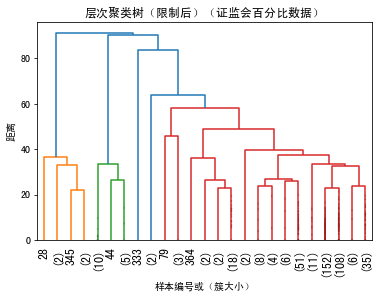

In [28]:
plt.title('层次聚类树（限制后）（证监会百分比数据）')
plt.xlabel('样本编号或（簇大小）')
plt.ylabel('距离')
dendrogram(Za, truncate_mode='lastp', p=25, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()

In [42]:
Z = linkage(df1z_data, 'average')
c, coph_dists = cophenet(Z, pdist(df1z_data))
print(c)

0.9552699285632477


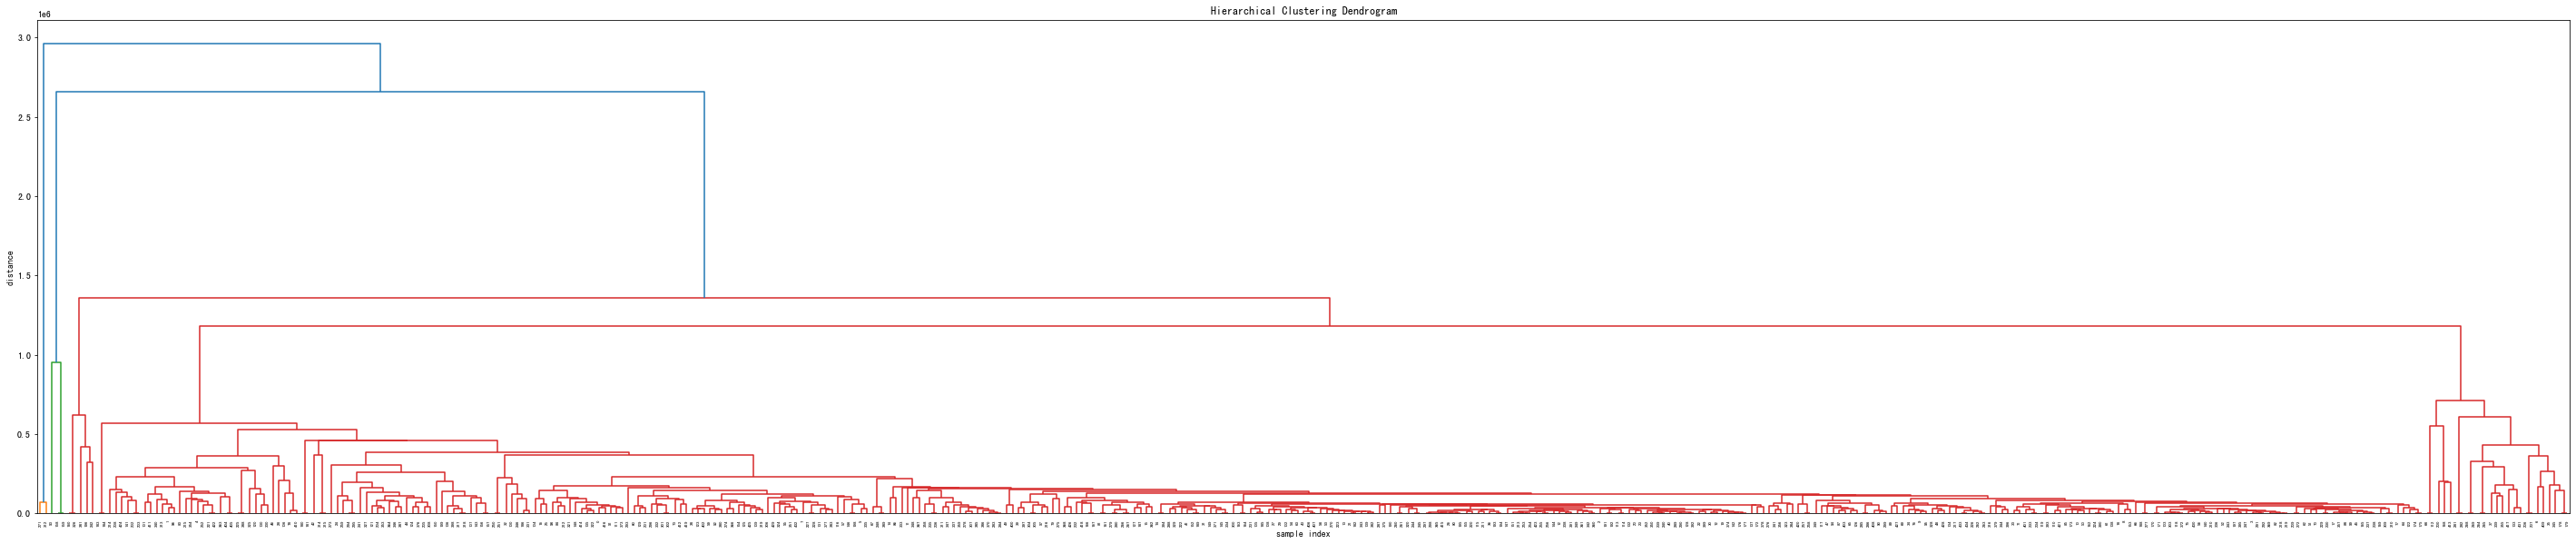

In [37]:
plt.figure(figsize=(50, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()

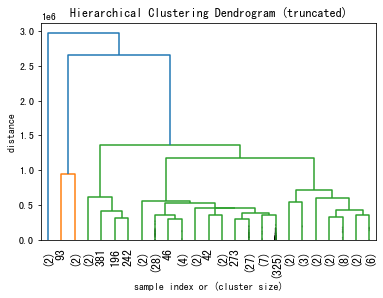

In [43]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(Z, truncate_mode='lastp', p=25, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()

### 2.2.4 风险衡量
1. 构建数据

In [61]:
# 从文件中读取净值信息
df_trend = data_prep.get_fund_data('src/fund_trend.csv')
codes = df_trend.apply(lambda row: str(int(row['code'])).zfill(6), axis=1)
df_trend['code'] = codes
# df_trend

# 增加标签列
df_trend.insert(1, 'category', predictions_sp['cluster_7'])
df_trend

,code,category,2020-04-09,2020-04-10,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-06,2020-05-07,2020-05-08,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-22,2020-06-23,2020-06-24,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29,2020-09-30,2020-10-09,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-08,2021-02-09,2021-02-10,2021-02-18,2021-02-19,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-06,2021-04-07,2020-05-09,2020-09-27
0,000082,4,1.2250,1.2140,1.2070,1.2320,1.2240,1.2280,1.2380,1.2460,1.2350,1.2470,1.2440,1.2350,1.2430,1.2520,1.2600,1.2750,1.2860,1.2870,1.3030,1.3010,1.3050,1.3120,1.2990,1.3000,1.3040,1.3210,1.3100,1.3030,1.2730,1.2750,1.2960,1.2880,1.2920,1.3030,1.3370,1.3360,1.3380,1.3400,1.3440,1.3470,1.3580,1.3640,1.3570,1.3610,1.3510,1.3740,1.3820,1.3860,1.4030,1.4050,1.4190,1.4230,1.4210,1.4460,1.4660,1.4840,1.5020,1.5700,1.5920,1.6220,1.6550,1.6390,1.6790,1.6710,1.6520,1.6000,1.6140,1.6540,1.6690,1.6800,1.6880,1.6100,1.6120,1.6320,1.6710,1.6670,1.6870,1.7170,1.7160,1.7260,1.7280,1.7110,1.7150,1.6950,1.6780,1.6760,1.7030,1.7380,1.7500,1.7170,1.6960,1.7130,1.7320,1.7320,1.7060,1.7150,1.7530,1.7400,1.7470,1.7440,1.7330,1.7200,1.6790,1.6860,1.6450,1.6460,1.6640,1.6720,1.6880,1.6770,1.6750,1.7060,1.6930,1.6770,1.6860,1.6540,1.6520,1.6540,1.6630,1.6600,1.6950,1.7440,1.7530,1.7440,1.7420,1.7370,1.7230,1.7390,1.7360,1.7260,1.6950,1.6890,1.7030,1.7190,1.7360,1.7020,1.7120,1.7320,1.7440,1.7680,1.7580,1.7890,1.7830,1.7650,1.7670,1.7490,1.7670,1.7600,1.7570,1.7710,1.7780,1.7950,1.7870,1.7590,1.7620,1.7780,1.7690,1.8030,1.8030,1.8030,1.8130,1.8050,1.8030,1.7800,1.7800,1.7630,1.7870,1.7940,1.8000,1.8200,1.8120,1.8360,1.8070,1.8210,1.8130,1.8300,1.8410,1.8350,1.8650,1.9000,1.9250,1.9560,1.9760,2.0100,2.

In [62]:
df_trend.describe()

,category,2020-04-09,2020-04-10,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-06,2020-05-07,2020-05-08,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-22,2020-06-23,2020-06-24,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29,2020-09-30,2020-10-09,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-08,2021-02-09,2021-02-10,2021-02-18,2021-02-19,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-06,2021-04-07,2020-05-09,2020-09-27
count,433.000000,380.000000,382.000000,376.000000,379.000000,380.000000,379.000000,386.000000,379.000000,380.000000,380.000000,381.000000,389.000000,381.000000,379.000000,379.000000,386.000000,381.000000,382.000000,390.000000,382.000000,382.000000,382.000000,382.000000,391.000000,384.000000,384.000000,387.000000,386.000000,397.000000,390.000000,390.000000,390.000000,390.000000,397.000000,390.000000,390.000000,390.000000,390.000000,398.000000,390.000000,390.000000,390.000000,390.000000,399.000000,391.000000,392.000000,391.000000,393.000000,400.000000,393.000000,391.000000,398.000000,394.000000,401.000000,391.000000,394.000000,401.000000,395.000000,395.000000,395.000000,396.000000,401.000000,397.000000,397.000000,397.000000,398.000000,402.000000,399.000000,399.000000,400.000000,400.000000,405.000000,399.000000,399.000000,400.000000,400.000000,406.000000,399.000000,399.000000,400.000000,401.000000,407.000000,401.000000,402.000000,402.000000,403.000000,413.000000,404.000000,403.000000,403.000000,404.000000,415.000000,406.000000,404.000000,405.000000,405.000000,419.000000,404.000000,405.000000,404.000000,404.000000,420.000000,405.000000,405.000000,407.000000,406.000000,423.000000,406.000000,405.000000,407.000000,407.000000,425.000000,408.000000,409.000000,411.000000,413.000000,428.000000,41

In [63]:
df_trend.shape

(433, 246)

查看数据缺失的情况

In [64]:
df_trend.isnull().sum().sort_values(ascending=False)

2020-09-27    432
2020-05-09    432
2020-04-13     57
2020-04-14     54
2020-04-16     54
             ... 
2021-01-22      0
2021-01-15      0
2021-01-08      0
category        0
code            0
Length: 246, dtype: int64

前两个数据仅有1支基金包含，因此直接删除列   
其余基金可以删除行

In [65]:
# 删除有空值的行和列
df_trend = df_trend.drop(['2020-09-27', '2020-05-09'], axis = 1)
df_trend = df_trend.dropna(how='any')
df_trend.isnull().sum().sort_values(ascending=False)

code          0
2020-11-23    0
2020-11-25    0
2020-11-26    0
2020-11-27    0
             ..
2020-08-11    0
2020-08-12    0
2020-08-13    0
2020-08-14    0
2021-04-07    0
Length: 244, dtype: int64

In [66]:
# 查看去除缺失值后的类别分布
print(df_trend['category'].value_counts().sort_index())

0     24
1     30
2     31
3     25
4     98
5    110
6     56
Name: category, dtype: int64


In [25]:
# 按类别抽取
categoried_samples = pd.DataFrame()
for i in range(0, 7):
    funds = df_trend[df_trend['category'] == i]
    sample = funds.sample(1)
    categoried_samples = pd.concat([categoried_samples, sample], ignore_index=True)
categoried_samples

,code,category,2020-04-09,2020-04-10,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-20,...,2021-03-24,2021-03-25,2021-03-26,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-06,2021-04-07
0,005894,0,1.3711,1.3255,1.3046,1.3453,1.3356,1.3535,1.3688,1.3895,...,1.7331,1.7437,1.8203,1.8275,1.8673,1.8470,1.9050,1.9382,1.9321,1.8885
1,005310,1,1.3248,1.2790,1.2514,1.3036,1.3057,1.3224,1.3395,1.3513,...,1.6945,1.6994,1.7413,1.7295,1.7374,1.7294,1.7555,1.7811,1.7829,1.7776
2,001171,2,1.2650,1.2470,1.2560,1.2780,1.2750,1.2960,1.2840,1.3010,...,1.8640,1.8930,1.9630,1.9770,2.0180,2.0000,2.0290,2.0480,2.0250,2.0170
3,001166,3,0.7030,0.6910,0.6830,0.7030,0.7040,0.7110,0.7170,0.7230,...,1.1830,1.1870,1.2270,1.2160,1.2300,1.2250,1.2380,1.2480,1.2500,1.2380
4,004606,4,1.1073,1.0966,1.0891,1.1084,1.1028,1.1074,1.1182,1.1229,...,1.4812,1.4792,1.5125,1.5163,1.5273,1.5156,1.5368,1.5507,1.5430,1.5325
5,001764,5,1.0650,1.0550,1.0530,1.0700,1.0610,1.0720,1.0870,1.1060,...,1.6460,1.6530,1.6900,1.6810,1.7010,1.6910,1.7480,1.7530,1.7460,1.7290
6,005188,6,1.2275,1.2070,1.2014,1.2274,1.2251,1.2330,1.2373,1.2486,...,1.6486,1.6646,1.7072,1.7121,1.7321,1.7115,1.7332,1.7528,1.7610,1.7543


In [26]:
# 随机抽取
random_samples = pd.DataFrame()
for i in range(0, 7):
    funds = df_trend[df_trend['category'] == 6]
    sample = funds.sample(1)
    random_samples = pd.concat([random_samples, sample], ignore_index=True)
random_samples

,code,category,2020-04-09,2020-04-10,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-20,...,2021-03-24,2021-03-25,2021-03-26,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-06,2021-04-07
0,006693,6,1.3989,1.3883,1.3835,1.4026,1.3812,1.3941,1.4011,1.4071,...,1.7890,1.8038,1.8505,1.8531,1.8765,1.8691,1.9173,1.9491,1.9373,1.9105
1,001048,6,1.2190,1.2140,1.2120,1.2210,1.2160,1.2230,1.2270,1.2200,...,1.6950,1.7140,1.7740,1.7760,1.8080,1.7920,1.8310,1.8610,1.8490,1.8270
2,540009,6,0.9935,0.9833,0.9868,1.0022,0.9938,0.9979,1.0043,1.0121,...,1.2337,1.2376,1.2656,1.2696,1.2840,1.2683,1.2150,1.2313,1.2230,1.2055
3,167702,6,1.4106,1.4006,1.3955,1.4208,1.4116,1.4137,1.4235,1.4299,...,1.4923,1.4957,1.5292,1.5311,1.5459,1.5294,1.5495,1.5685,1.5676,1.5544
4,007614,6,1.1267,1.1033,1.0975,1.1191,1.1142,1.1218,1.1208,1.1372,...,1.2547,1.2572,1.2796,1.2879,1.2920,1.2869,1.3012,1.3082,1.3192,1.3200
5,004352,6,1.0800,1.0535,1.0438,1.0732,1.0707,1.0840,1.0890,1.1001,...,1.4389,1.4366,1.4605,1.4710,1.4741,1.4616,1.4739,1.4692,1.4823,1.4925
6,005189,6,1.2147,1.1944,1.1889,1.2147,1.2124,1.2202,1.2244,1.2357,...,1.6374,1.6534,1.6957,1.7006,1.7205,1.7000,1.7216,1.7411,1.7493,1.7427


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

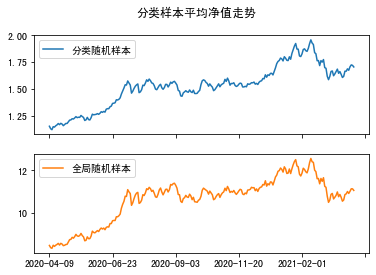

In [27]:
categoried_samples_value = categoried_samples.sum()[2:] / 7
random_samples_value = random_samples.sum()[2:]
value = pd.DataFrame([categoried_samples_value, random_samples_value]).T
value.columns = ['分类随机样本', '单类随机样本']

# print(value)
value.plot(title="分类样本平均净值走势",subplots=True)

,分类随机样本,全局随机样本
count,241.000000,241.000000
mean,0.001747,0.001211
std,0.015370,0.013639
min,-0.052722,-0.051319
25%,-0.007662,-0.007075
50%,0.003158,0.002774
75%,0.013088,0.010800
max,0.035904,0.030031


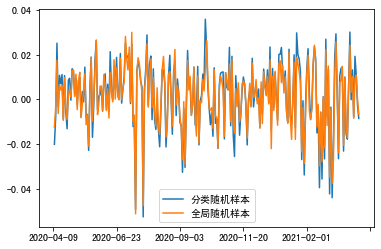

In [28]:
# 计算日回报率
value_returns =value.pct_change()
value_returns.plot()
value_returns.describe()

,分类随机样本,全局随机样本
count,241.000000,241.000000
mean,0.001147,0.000611
std,0.015370,0.013639
min,-0.053322,-0.051919
25%,-0.008262,-0.007675
50%,0.002558,0.002174
75%,0.012488,0.010200
max,0.035304,0.029431


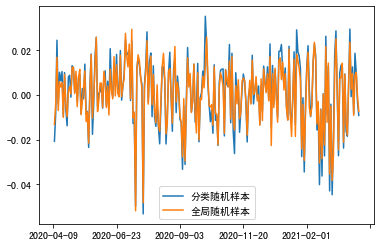

In [29]:
# 计算超额收益
excess_returns = value_returns.sub(0.0006,axis=0)
excess_returns.plot()
excess_returns.describe()

<AxesSubplot:title={'center':'超额回报均值'}>

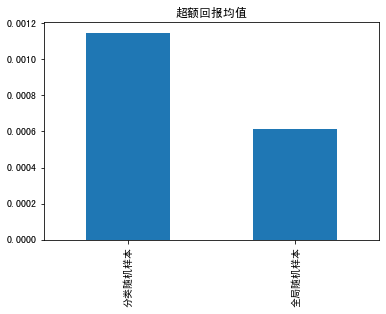

In [30]:
# 超额回报的均值
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title='超额回报均值')

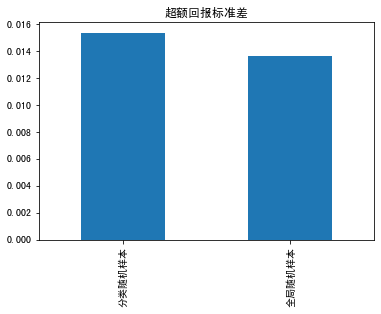

In [31]:
# 超额回报的标准差
sd_excess_return = excess_returns.std()
sd_excess_return.plot.bar(title='超额回报标准差');

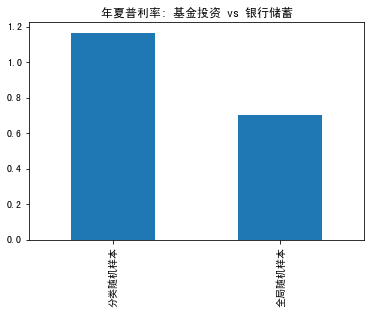

In [32]:
# 计算年夏普比率
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)
annual_factor =np.sqrt(244)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
annual_sharpe_ratio.plot.bar(title='年夏普利率: 基金投资 vs 银行储蓄');

In [68]:
categoried_sharpe_ratio = 0
random_sharpe_ratio = 0
single_sharpe_ratio = 0

TEST_NUM = 500
for n in range(0, TEST_NUM):
    categoried_samples = pd.DataFrame()
    for i in range(0, 7):
        # 按类别抽取
        funds = df_trend[df_trend['category'] == i]
        sample = funds.sample(1)
        categoried_samples = pd.concat([categoried_samples, sample], ignore_index=True)
        

    # 随机一类抽取
    random_samples = pd.DataFrame()
    cate = random.randrange(7)
    for i in range(0, 7):
        funds = df_trend[df_trend['category'] == cate]
        sample = funds.sample(1)
        random_samples = pd.concat([random_samples, sample], ignore_index=True)
    random_samples
    
    # 随机一个抽取
    single_sample =  df_trend.sample(1)

    categoried_samples_value = categoried_samples.sum()[2:] / 7
    random_samples_value = random_samples.sum()[2:] / 7 
    single_sample = single_sample.sum()[2:] 
    value = pd.DataFrame([categoried_samples_value, random_samples_value, single_sample]).T
    value.columns = ['分类随机样本', '单类随机样本','单个随机样本']
    
    value_returns =value.pct_change()
    excess_returns = value_returns.sub(0.0006,axis=0)
    avg_excess_return = excess_returns.mean()
    sd_excess_return = excess_returns.std()
    daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)
    annual_factor =np.sqrt(244)
    annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
    
#     print(annual_sharpe_ratio)
    categoried_sharpe_ratio = categoried_sharpe_ratio + annual_sharpe_ratio['分类随机样本']
    random_sharpe_ratio = random_sharpe_ratio + annual_sharpe_ratio['单类随机样本']
    single_sharpe_ratio = single_sharpe_ratio + annual_sharpe_ratio['单个随机样本']

categoried_sharpe_ratio = categoried_sharpe_ratio / TEST_NUM
random_sharpe_ratio = random_sharpe_ratio / TEST_NUM
single_sharpe_ratio = single_sharpe_ratio / TEST_NUM

print(categoried_sharpe_ratio, random_sharpe_ratio, single_sharpe_ratio)
    

1.275954445143158 1.2303313438682961 1.1410285962628557
